In [1]:
import numpy as np
txt=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]

In [2]:
txtList=[i.split(' ') for i in txt]
txtList

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

In [3]:
wordList=[]
nouns=sorted(list(set([n for i in txtList for n in i])))

In [4]:
import pandas as pd
dtm=[]
for i in txtList:
    dtm.append([])
    for j in nouns:
        dtm[-1].append(i.count(j))
tf_=pd.DataFrame(dtm, columns=nouns)

In [5]:
import numpy as np

D=len(tf_) #총문서수
df=tf_.astype(bool).sum()
idf=D/df

In [6]:
tfidf_=tf_*idf
tfidf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0.0,3.0,0.0,0.0,1.5,3.0
1,1.5,0.0,0.0,0.0,3.0,1.5
2,1.5,0.0,3.0,3.0,0.0,0.0


In [7]:
tfidf_.corr()

,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


In [8]:
import numpy as np
import pandas as pd

word_corr=np.corrcoef(tf_,rowvar=False)
print(word_corr)

print('='*100)
vocab=tf_.columns
df=pd.DataFrame(word_corr,columns=vocab)
df.index=vocab
df

[[ 1.        -1.         0.5        0.5        0.        -0.8660254]
 [-1.         1.        -0.5       -0.5        0.         0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.         0.        -0.8660254 -0.8660254  1.         0.5      ]
 [-0.8660254  0.8660254 -0.8660254 -0.8660254  0.5        1.       ]]


,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


In [9]:
words=tf_.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))
edges

[('R', '머신러닝', np.float64(-1.0)),
 ('R', '분석', np.float64(0.4999999999999999)),
 ('R', '시각화', np.float64(0.4999999999999999)),
 ('R', '차트', np.float64(0.0)),
 ('R', '파이썬', np.float64(-0.8660254037844385)),
 ('머신러닝', '분석', np.float64(-0.5)),
 ('머신러닝', '시각화', np.float64(-0.5)),
 ('머신러닝', '차트', np.float64(0.0)),
 ('머신러닝', '파이썬', np.float64(0.8660254037844387)),
 ('분석', '시각화', np.float64(0.9999999999999998)),
 ('분석', '차트', np.float64(-0.8660254037844385)),
 ('분석', '파이썬', np.float64(-0.8660254037844385)),
 ('시각화', '차트', np.float64(-0.8660254037844385)),
 ('시각화', '파이썬', np.float64(-0.8660254037844385)),
 ('차트', '파이썬', np.float64(0.5))]

In [10]:
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges 

[('분석', '시각화', np.float64(0.9999999999999998)),
 ('머신러닝', '파이썬', np.float64(0.8660254037844387)),
 ('차트', '파이썬', np.float64(0.5)),
 ('R', '분석', np.float64(0.4999999999999999)),
 ('R', '시각화', np.float64(0.4999999999999999)),
 ('R', '차트', np.float64(0.0)),
 ('머신러닝', '차트', np.float64(0.0)),
 ('머신러닝', '분석', np.float64(-0.5)),
 ('머신러닝', '시각화', np.float64(-0.5)),
 ('R', '파이썬', np.float64(-0.8660254037844385)),
 ('분석', '차트', np.float64(-0.8660254037844385)),
 ('분석', '파이썬', np.float64(-0.8660254037844385)),
 ('시각화', '차트', np.float64(-0.8660254037844385)),
 ('시각화', '파이썬', np.float64(-0.8660254037844385)),
 ('R', '머신러닝', np.float64(-1.0))]

In [11]:
!pip install networkx

In [12]:
import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('R', '파이썬'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('머신러닝', '차트'),
 ('머신러닝', '파이썬'),
 ('분석', '시각화'),
 ('차트', '파이썬')}

In [13]:
edges

[('분석', '시각화', np.float64(0.9999999999999998)),
 ('머신러닝', '파이썬', np.float64(0.8660254037844387)),
 ('차트', '파이썬', np.float64(0.5)),
 ('R', '분석', np.float64(0.4999999999999999)),
 ('R', '시각화', np.float64(0.4999999999999999)),
 ('R', '차트', np.float64(0.0)),
 ('머신러닝', '차트', np.float64(0.0)),
 ('머신러닝', '분석', np.float64(-0.5)),
 ('머신러닝', '시각화', np.float64(-0.5)),
 ('R', '파이썬', np.float64(-0.8660254037844385)),
 ('분석', '차트', np.float64(-0.8660254037844385)),
 ('분석', '파이썬', np.float64(-0.8660254037844385)),
 ('시각화', '차트', np.float64(-0.8660254037844385)),
 ('시각화', '파이썬', np.float64(-0.8660254037844385)),
 ('R', '머신러닝', np.float64(-1.0))]

In [14]:
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[('분석', '시각화'),
 ('머신러닝', '파이썬'),
 ('차트', '파이썬'),
 ('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('머신러닝', '차트'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('R', '파이썬'),
 ('분석', '차트'),
 ('분석', '파이썬'),
 ('시각화', '차트'),
 ('시각화', '파이썬'),
 ('R', '머신러닝')]

In [15]:
print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())


 ▶ 노드갯수 출력
6


In [16]:
set([j for i in list(edge_set) for j in i])

{'R', '머신러닝', '분석', '시각화', '차트', '파이썬'}

In [17]:
print('\n ▶노드값 출력')
print(G.nodes)


 ▶노드값 출력
['분석', '시각화', '머신러닝', '파이썬', '차트', 'R']


In [18]:
print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


 ▶ 엣지(word1,word2)값 출력
[('분석', '시각화'), ('분석', 'R'), ('분석', '머신러닝'), ('시각화', 'R'), ('시각화', '머신러닝'), ('머신러닝', '파이썬'), ('머신러닝', '차트'), ('파이썬', '차트'), ('파이썬', 'R'), ('차트', 'R')]


In [19]:
print('\n ▶ 디그리값 출력')  
print(G.degree)


 ▶ 디그리값 출력
[('분석', 3), ('시각화', 3), ('머신러닝', 4), ('파이썬', 3), ('차트', 3), ('R', 4)]


In [20]:
print('\n ▶ 인접')
print(G.adj)


 ▶ 인접
{'분석': {'시각화': {'weight': np.float64(0.9999999999999998)}, 'R': {'weight': np.float64(0.4999999999999999)}, '머신러닝': {'weight': np.float64(-0.5)}}, '시각화': {'분석': {'weight': np.float64(0.9999999999999998)}, 'R': {'weight': np.float64(0.4999999999999999)}, '머신러닝': {'weight': np.float64(-0.5)}}, '머신러닝': {'파이썬': {'weight': np.float64(0.8660254037844387)}, '차트': {'weight': np.float64(0.0)}, '분석': {'weight': np.float64(-0.5)}, '시각화': {'weight': np.float64(-0.5)}}, '파이썬': {'머신러닝': {'weight': np.float64(0.8660254037844387)}, '차트': {'weight': np.float64(0.5)}, 'R': {'weight': np.float64(-0.8660254037844385)}}, '차트': {'파이썬': {'weight': np.float64(0.5)}, 'R': {'weight': np.float64(0.0)}, '머신러닝': {'weight': np.float64(0.0)}}, 'R': {'분석': {'weight': np.float64(0.4999999999999999)}, '시각화': {'weight': np.float64(0.4999999999999999)}, '차트': {'weight': np.float64(0.0)}, '파이썬': {'weight': np.float64(-0.8660254037844385)}}}


In [21]:
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


 ▶ edges의 갯수
10


In [22]:
print('\n ▶ 요약 ')
print(f"노드의 개수: {G.number_of_nodes()}")
print(f"엣지의 개수: {G.number_of_edges()}")
print(f"노드 목록: {list(G.nodes())}")
print(f"엣지 목록: {list(G.edges())}")


 ▶ 요약 
노드의 개수: 6
엣지의 개수: 10
노드 목록: ['분석', '시각화', '머신러닝', '파이썬', '차트', 'R']
엣지 목록: [('분석', '시각화'), ('분석', 'R'), ('분석', '머신러닝'), ('시각화', 'R'), ('시각화', '머신러닝'), ('머신러닝', '파이썬'), ('머신러닝', '차트'), ('파이썬', '차트'), ('파이썬', 'R'), ('차트', 'R')]


In [23]:
tmp=np.sum(tf_)
print(tmp)
print('='*100)
nsize=tmp
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

print(nsize)

R       2
머신러닝    1
분석      1
시각화     1
차트      3
파이썬     3
dtype: int64
R       1000.0
머신러닝       0.0
분석         0.0
시각화        0.0
차트      2000.0
파이썬     2000.0
dtype: float64


C:\Users\go121\.conda\envs\edu\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [24]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [34]:
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[np.float64(0.9999999999999998),
 np.float64(0.8660254037844387),
 np.float64(0.5),
 np.float64(0.4999999999999999),
 np.float64(0.4999999999999999),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-0.5),
 np.float64(-0.5),
 np.float64(-0.8660254037844385),
 np.float64(-0.8660254037844385),
 np.float64(-0.8660254037844385),
 np.float64(-0.8660254037844385),
 np.float64(-0.8660254037844385),
 np.float64(-1.0)]

[('분석', '시각화', np.float64(0.9999999999999998)), ('머신러닝', '파이썬', np.float64(0.8660254037844387)), ('차트', '파이썬', np.float64(0.5)), ('R', '분석', np.float64(0.4999999999999999)), ('R', '시각화', np.float64(0.4999999999999999)), ('R', '차트', np.float64(0.0)), ('머신러닝', '차트', np.float64(0.0)), ('머신러닝', '분석', np.float64(-0.5)), ('머신러닝', '시각화', np.float64(-0.5)), ('R', '파이썬', np.float64(-0.8660254037844385))]


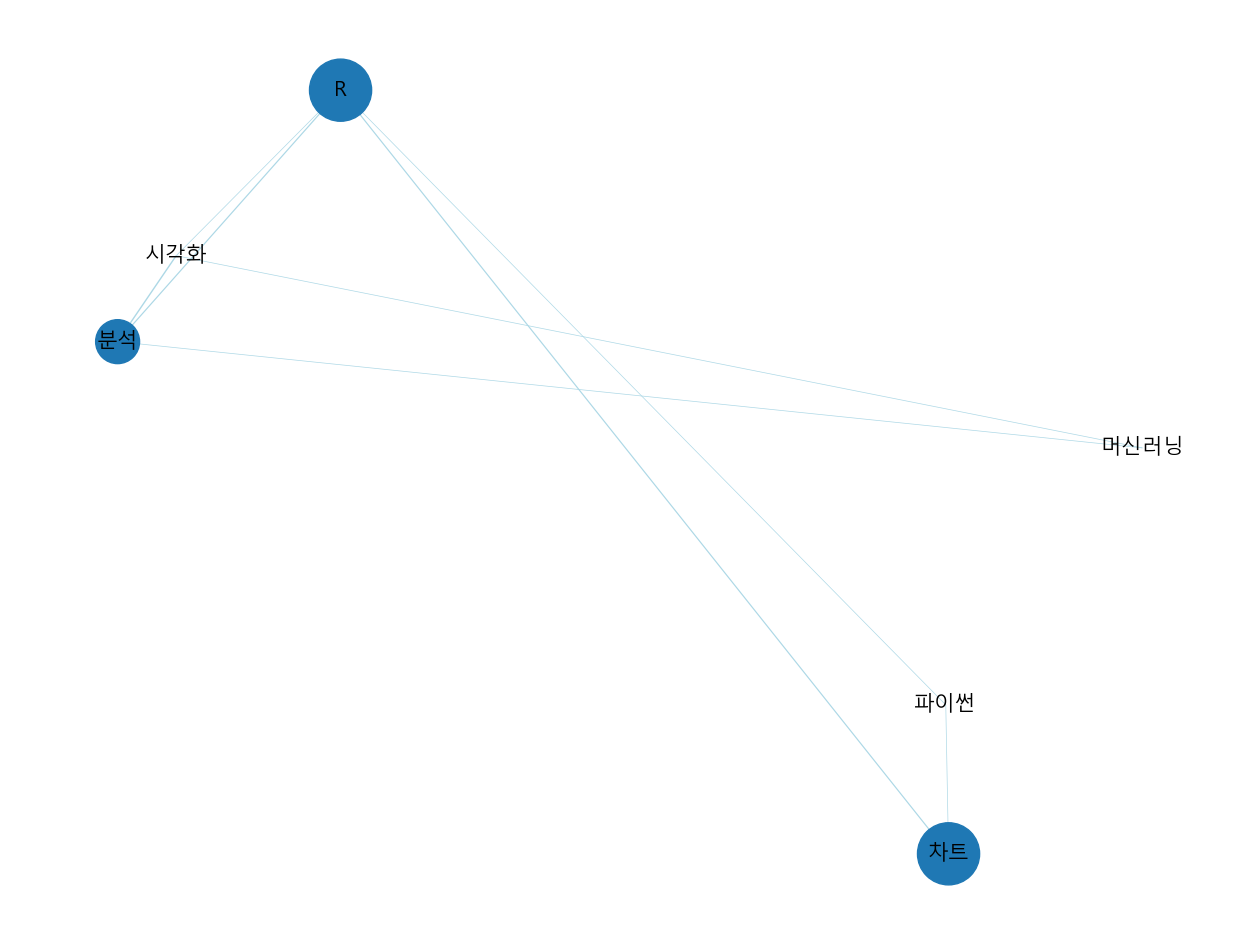

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()


print(edges[:rank])
nx.draw_networkx(G, with_labels = True,
                 font_family=fname,width=weight_list[:rank],edge_color='lightblue',font_size=15,
                 node_size=nsize)

In [27]:
a = np.sum(tf_)

C:\Users\go121\.conda\envs\edu\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [28]:
a-a.min()

R       1
머신러닝    0
분석      0
시각화     0
차트      2
파이썬     2
dtype: int64

In [29]:
a.max()-a.min()

np.int64(2)

In [30]:
(a-a.min())/(a.max()-a.min())

R       0.5
머신러닝    0.0
분석      0.0
시각화     0.0
차트      1.0
파이썬     1.0
dtype: float64